# FFT

In [1]:
import numpy as np
import matplotlib.pyplot  as plt

from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

from scipy.fft import fft2, fftshift
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.data import astronaut

from skimage import filters
# from skimage.filter import window

In [2]:
from skimage import data

In [3]:
data.camera().shape

(512, 512)

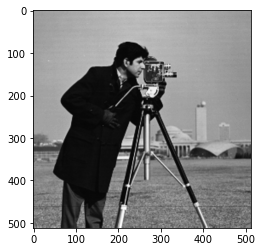

In [4]:
plt.figure()
plt.imshow(data.camera(), cmap='gray')

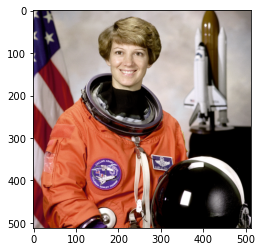

In [5]:
plt.imshow(data.astronaut())

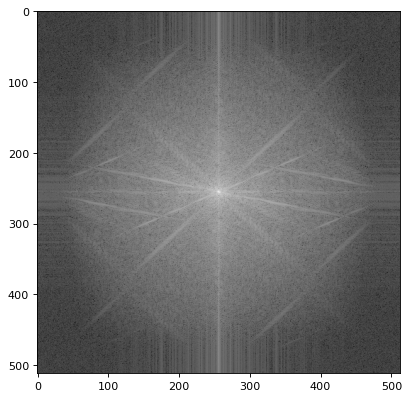

In [6]:
dark_image = data.camera()

dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

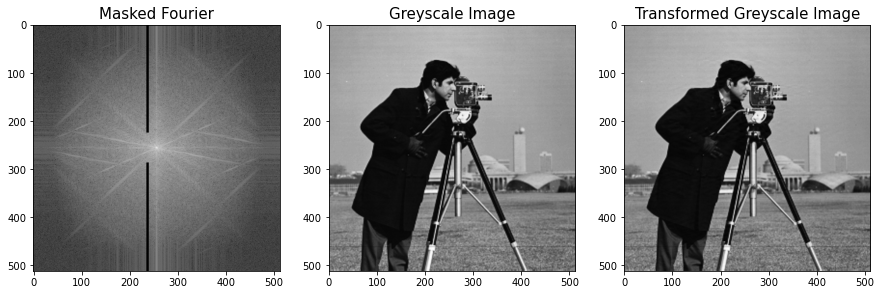

In [7]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier =  np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:225, 235:240] = i
    dark_image_grey_fourier[-225:,235:240] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
    
fourier_masker_ver(dark_image, 1)

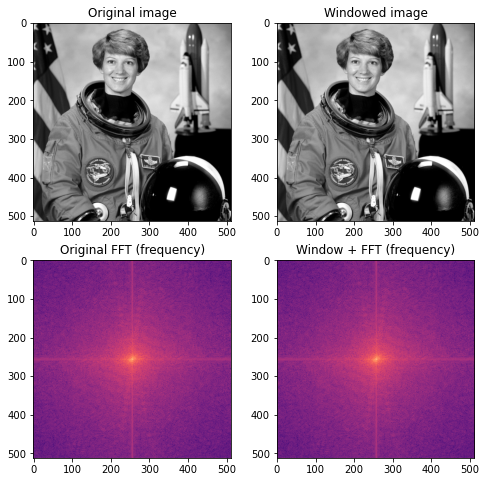

In [8]:
image = img_as_float(rgb2gray(astronaut()))
# wimage = image * filters.window('hann', image.shape)

image_f = np.abs(fftshift(fft2(image)))
# wimage_f = np.abs(fftshift(fft2(wimage)))

wim = np.fft.fft2(image)
wim = np.fft.fftshift(wim)
wimage_f = np.abs(wim)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("Windowed image")
ax[1].imshow(image, cmap='gray')
ax[2].set_title("Original FFT (frequency)")
ax[2].imshow(np.log(image_f), cmap='magma')
ax[3].set_title("Window + FFT (frequency)")
ax[3].imshow(np.log(wimage_f), cmap='magma')
plt.show()

In [9]:
np.abs(image_f - wimage_f)

array([[0.00000000e+00, 4.97379915e-14, 6.82787160e-14, ...,
        2.13162821e-14, 2.58681965e-14, 1.15463195e-13],
       [2.22044605e-15, 1.04805054e-13, 8.88178420e-15, ...,
        3.15303339e-14, 1.11910481e-13, 4.44089210e-14],
       [2.66453526e-15, 2.22044605e-16, 4.44089210e-15, ...,
        3.33066907e-14, 1.99840144e-14, 6.21724894e-15],
       ...,
       [1.77635684e-15, 2.30926389e-14, 9.19264664e-14, ...,
        7.32747196e-14, 9.41469125e-14, 5.24025268e-14],
       [1.77635684e-15, 3.55271368e-15, 5.72875081e-14, ...,
        8.43769499e-15, 4.08562073e-14, 9.68114477e-14],
       [1.77635684e-15, 3.50830476e-14, 3.64153152e-14, ...,
        8.88178420e-15, 3.99680289e-14, 6.66133815e-14]])

In [10]:
# Get magnitude and phase
magnitude = np.abs(image_f)
phase = np.angle(image_f)
print("Magnitude:", magnitude, ", phase:", phase)

Magnitude: [[1.26735137 4.8195861  0.91964335 ... 6.87778108 0.91964335 4.8195861 ]
 [2.34376881 4.1198105  3.73908287 ... 3.06761216 4.12281699 2.48354334]
 [6.22141785 1.92331406 4.41163606 ... 3.88590021 1.34079361 4.47060429]
 ...
 [8.64708842 7.58572291 3.81254562 ... 3.998736   9.88692718 4.9155436 ]
 [6.22141785 4.47060429 1.34079361 ... 1.895405   4.41163606 1.92331406]
 [2.34376881 2.48354334 4.12281699 ... 4.22336687 3.73908287 4.1198105 ]] , phase: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
phase_2 = np.phase(image_f)

AttributeError: module 'numpy' has no attribute 'phase'

In [16]:
image.shape

(512, 512)

In [79]:
def mean_projection_fft(x):
    x_image = np.fft.fft2(x)
    print("x_image", x_image.shape)
    # calculate the mean for each pixel over the channels
    mean_image = x_image[:,:].copy()
    # x_image = np.abs(x_image) #only look at the magnitude
    row, col = mean_image[:,:,0].shape
    for i in range(row):
        for j in range(col):
            mean_image[i,j] = np.mean( np.abs(x_image[i,j, :]) )
    return mean_image


In [80]:
fft2image = fft2(astron)

In [81]:
fft2image.shape

(512, 512, 3)

In [82]:
shifted = fftshift(np.abs(fft2image))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


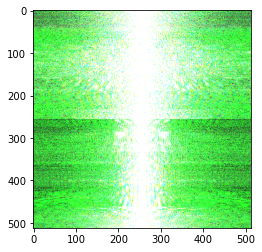

In [83]:
plt.figure()

plt.imshow(shifted)

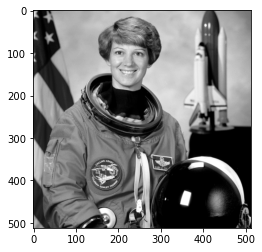

In [84]:
plt.figure()
astron = img_as_float( rgb2gray(astronaut()) )
plt.imshow(astron, cmap='gray')

(512, 512, 3)
(3, 512, 512)

image.shape (3, 512, 512)
image_f.shape (512, 512)


array([[[1.38140769e+12, 1.38140769e+12, 1.38140769e+12],
        [5.75192054e+11, 5.75192054e+11, 5.75192054e+11],
        [1.15534403e+12, 1.15534403e+12, 1.15534403e+12],
        ...,
        [2.04835605e+12, 2.04835605e+12, 2.04835605e+12],
        [1.15534403e+12, 1.15534403e+12, 1.15534403e+12],
        [5.75192054e+11, 5.75192054e+11, 5.75192054e+11]],

       [[2.18221153e+12, 2.18221153e+12, 2.18221153e+12],
        [1.63163057e+12, 1.63163057e+12, 1.63163057e+12],
        [1.74361632e+12, 1.74361632e+12, 1.74361632e+12],
        ...,
        [2.52174140e+12, 2.52174140e+12, 2.52174140e+12],
        [1.74361632e+12, 1.74361632e+12, 1.74361632e+12],
        [1.63163057e+12, 1.63163057e+12, 1.63163057e+12]],

       [[2.93829181e+12, 2.93829181e+12, 2.93829181e+12],
        [1.37400835e+12, 1.37400835e+12, 1.37400835e+12],
        [1.04592120e+12, 1.04592120e+12, 1.04592120e+12],
        ...,
        [1.09899222e+12, 1.09899222e+12, 1.09899222e+12],
        [1.04592120e+12, 1.04

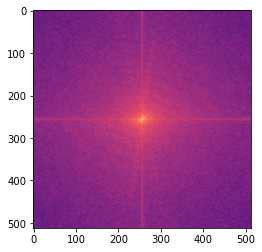

In [166]:
plt.figure()

# astron = img_as_float(rgb2gray( astronaut()) )

astron = img_as_float( astronaut() )

print(astron.shape)
print(astron.transpose((2, 0, 1)).shape)
print()

image = astron.transpose((2, 0, 1))
print("image.shape", image.shape)

image_f = np.mean(np.fft.fft2( image ), axis=0 )
image_f = np.abs(image_f)
image_f = np.fft.fftshift( np.abs(image_f) ) 
image_f = np.log(image_f)
print("image_f.shape", image_f.shape)



plt.imshow( image_f , cmap='magma' )
# plt.imshow( result.transpose(1,2,0) )
ad_fft

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


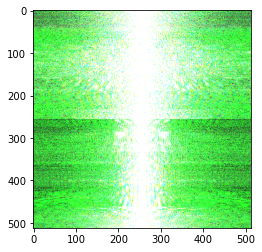

In [118]:
astron = img_as_float( astronaut() )

fft2image = np.abs( np.fft.fftshift(np.fft.fft2(astron)) )

plt.imshow(fft2image)

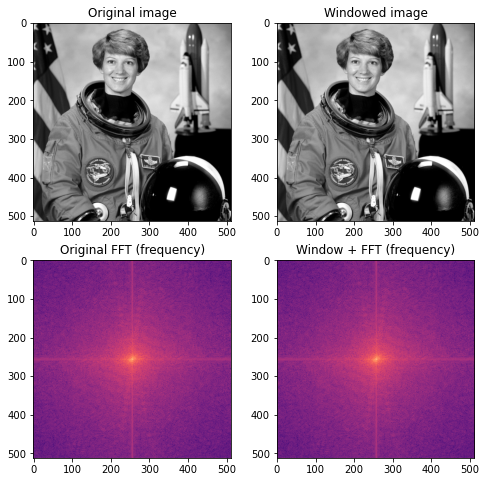

In [86]:
image = img_as_float(rgb2gray(astronaut()))
# wimage = image * filters.window('hann', image.shape)

image_f = np.abs(fftshift(fft2(image)))
# wimage_f = np.abs(fftshift(fft2(wimage)))

wim = np.fft.fft2(image)
wim = np.fft.fftshift(wim)
wimage_f = np.abs(wim)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("Windowed image")
ax[1].imshow(image, cmap='gray')
ax[2].set_title("Original FFT (frequency)")
ax[2].imshow(np.log(image_f), cmap='magma')
ax[3].set_title("Window + FFT (frequency)")
ax[3].imshow(np.log(wimage_f), cmap='magma')
plt.show()

In [135]:
dummy = np.zeros((32,32))

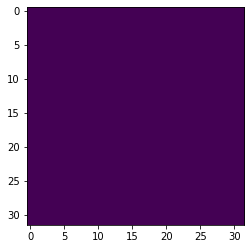

In [136]:
plt.figure()

plt.imshow(dummy)

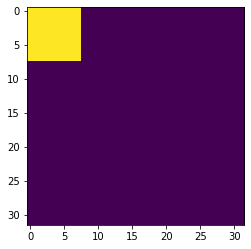

In [158]:
fr=0
to=8


dummy = np.zeros((32,32))
dummy[fr:to, fr:to] = 1
plt.imshow(dummy)

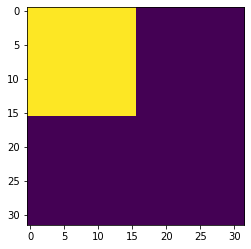

In [162]:
fr=0
to=16

dummy = np.zeros((32,32))
dummy[fr:to, fr:to] = 1
plt.imshow(dummy)

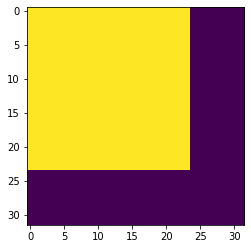

In [163]:
fr=0
to=24

dummy = np.zeros((32,32))
dummy[fr:to, fr:to] = 1
plt.imshow(dummy)

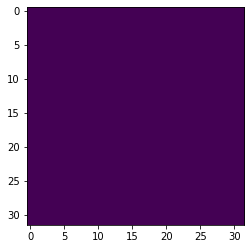

In [164]:
fr=0
to=32

dummy = np.zeros((32,32))
dummy[fr:to, fr:to] = 1
plt.imshow(dummy)

(512, 512, 3)
(3, 512, 512)
image.shape (3, 512, 512)
image_f.shape (3, 512, 512)
imagef.shape (100, 100)


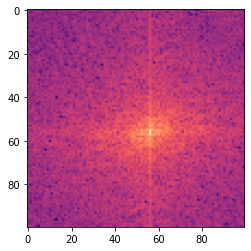

In [191]:
plt.figure()

# astron = img_as_float(rgb2gray( astronaut()) )

astron = img_as_float( astronaut() )

print(astron.shape)
print(astron.transpose((2, 0, 1)).shape)

image = astron.transpose((2, 0, 1))
print("image.shape", image.shape)

image_f = np.fft.fft2( image )
image_f = np.fft.fftshift(  image_f ) 
print("image_f.shape", image_f.shape)

image_f = image_f[:, 200:300, 200:300]

# image_f = np.fft.ifftshift(image_f)
# image_f = np.fft.ifft2(image_f)

# image_f = np.fft.fft2( image_f )
# image_f = np.fft.fftshift(  image_f ) 
image_f = np.abs(image_f)


image_f = np.log(image_f[0])

print("imagef.shape", image_f.shape)

plt.imshow(image_f, cmap='magma')
# plt.imshow(image_f.transpose((1,2,0)), cmap='magma')


TypeError: Image data of dtype complex128 cannot be converted to float

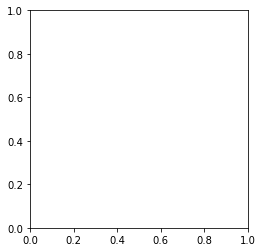

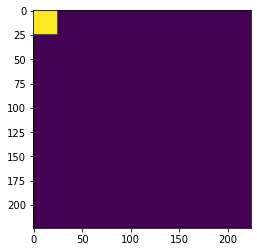

In [195]:
dummy = np.zeros((32, 32))

fr=0
to=25

dummy = np.zeros((224, 224))
dummy[fr:to, fr:to] = 1
plt.imshow(dummy)